In [428]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [430]:
#Load the data
diabetic_data = pd.read_csv(r"C:\Users\aasha\Downloads\diabetic_data_cleaned.csv")

In [431]:
#checking the data to see what it looks like now
diabetic_data.head()

,race,gender,age,admission_type_id,discharge_disposition_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,5,6,25,1,Pediatrics-Endocrinology,41,0,1,...,No,No,No,No,No,No,No,No,No,No
1,Caucasian,Female,15,1,1,3,0,59,0,18,...,No,Up,No,No,No,No,No,Yes,Yes,>30
2,AfricanAmerican,Female,25,1,1,2,0,11,5,13,...,No,No,No,No,No,No,No,No,Yes,No
3,Caucasian,Male,35,1,1,2,0,44,1,16,...,No,Up,No,No,No,No,No,Yes,Yes,No
4,Caucasian,Male,45,1,1,1,0,51,0,8,...,No,Steady,No,No,No,No,No,Yes,Yes,No


In [434]:
#checking the cconcise summary of the dataframe
diabetic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 43 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      101766 non-null  object
 1   gender                    101766 non-null  object
 2   age                       101766 non-null  int64 
 3   admission_type_id         101766 non-null  int64 
 4   discharge_disposition_id  101766 non-null  int64 
 5   time_in_hospital          101766 non-null  int64 
 6   medical_specialty         101766 non-null  object
 7   num_lab_procedures        101766 non-null  int64 
 8   num_procedures            101766 non-null  int64 
 9   num_medications           101766 non-null  int64 
 10  number_outpatient         101766 non-null  int64 
 11  number_emergency          101766 non-null  int64 
 12  number_inpatient          101766 non-null  int64 
 13  diag_1                    101766 non-null  object
 14  diag

In [436]:
#checking the dimention of the dataframe
diabetic_data.shape

(101766, 43)

In [438]:
#checking the summary statistics
diabetic_data.describe(include = 'all')

,race,gender,age,admission_type_id,discharge_disposition_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,101766,101766,101766.000000,101766.000000,101766.000000,101766.000000,101766,101766.000000,101766.000000,101766.000000,...,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,6,3,NaN,NaN,NaN,NaN,73,NaN,NaN,NaN,...,1,4,4,2,2,2,2,2,2,3
top,Caucasian,Female,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,...,No,No,No,No,No,No,No,No,Yes,No
freq,76099,54708,NaN,NaN,NaN,NaN,49949,NaN,NaN,NaN,...,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864
mean,NaN,NaN,65.967022,2.024006,3.715642,4.395987,NaN,43.095641,1.339730,16.021844,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,15.940838,1.445403,5.280166,2.985108,NaN,19.674362,1.705807,8.127566,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,5.000000,1.000000,1.000000,1.000000,NaN,1.000000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,55.000000,1.000000,1.000000,2.000000,NaN,31.000000,0.000000,10.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,65.000000,1.000000,1.000000,4.000000,NaN,44.000000,1.000000,15.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,75.000000,3.000000,4.000000,6.000000,NaN,57.000000,2.000000,20.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: title={'center': 'Readmission Class Distribution'}, xlabel='readmitted'>

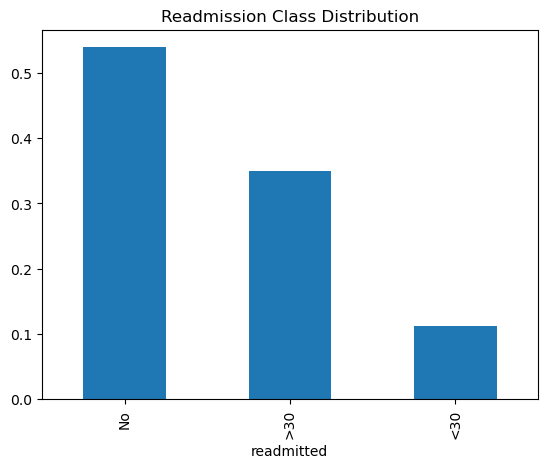

In [439]:
#Exploring the target variable 'readmitted'
diabetic_data['readmitted'].value_counts(normalize=True).plot(kind='bar', title='Readmission Class Distribution')

In [441]:
#converting to binary to predict the 30 day readmission
diabetic_data['readmitted_binary'] = diabetic_data['readmitted'].apply(lambda x: 1 if x == '<30' else 0)

In [444]:
diabetic_data.head()

,race,gender,age,admission_type_id,discharge_disposition_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmitted_binary
0,Caucasian,Female,5,6,25,1,Pediatrics-Endocrinology,41,0,1,...,No,No,No,No,No,No,No,No,No,0
1,Caucasian,Female,15,1,1,3,0,59,0,18,...,Up,No,No,No,No,No,Yes,Yes,>30,0
2,AfricanAmerican,Female,25,1,1,2,0,11,5,13,...,No,No,No,No,No,No,No,Yes,No,0
3,Caucasian,Male,35,1,1,2,0,44,1,16,...,Up,No,No,No,No,No,Yes,Yes,No,0
4,Caucasian,Male,45,1,1,1,0,51,0,8,...,Steady,No,No,No,No,No,Yes,Yes,No,0


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'admission_type_id'}>,
        <Axes: title={'center': 'discharge_disposition_id'}>],
       [<Axes: title={'center': 'time_in_hospital'}>,
        <Axes: title={'center': 'num_lab_procedures'}>,
        <Axes: title={'center': 'num_procedures'}>],
       [<Axes: title={'center': 'num_medications'}>,
        <Axes: title={'center': 'number_outpatient'}>,
        <Axes: title={'center': 'number_emergency'}>],
       [<Axes: title={'center': 'number_inpatient'}>,
        <Axes: title={'center': 'number_diagnoses'}>,
        <Axes: title={'center': 'readmitted_binary'}>]], dtype=object)

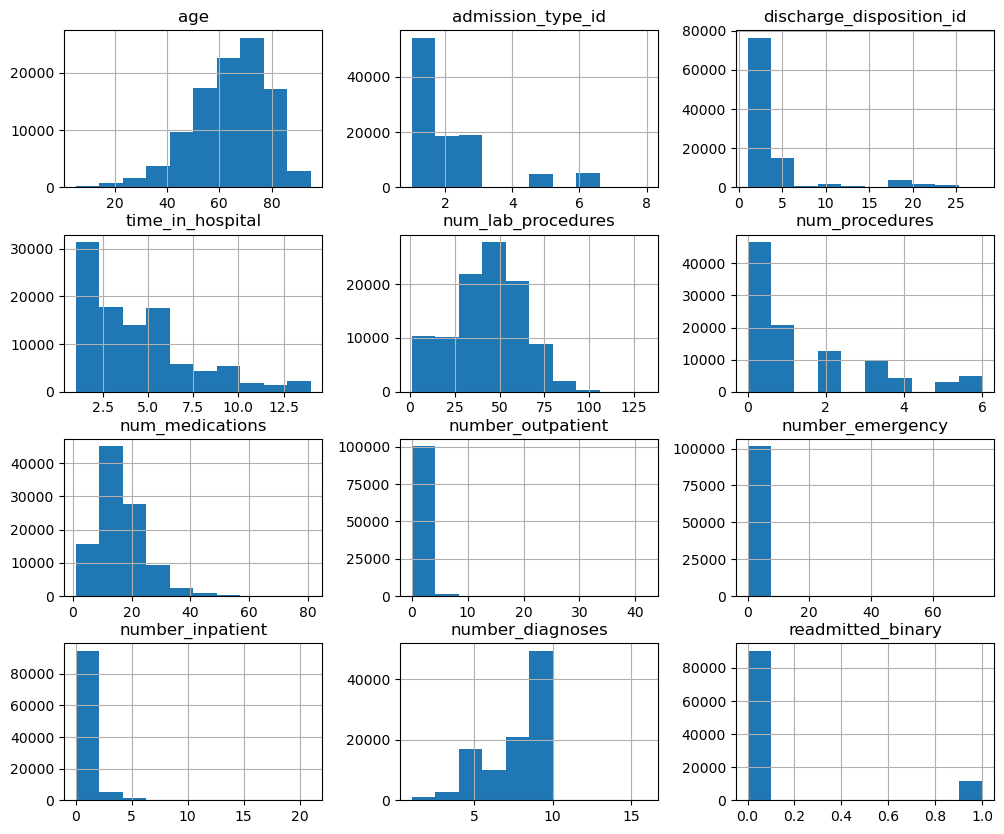

In [446]:
#analyzing the numeric variables
diabetic_data.hist(figsize=(12, 10))

<Axes: xlabel='race'>

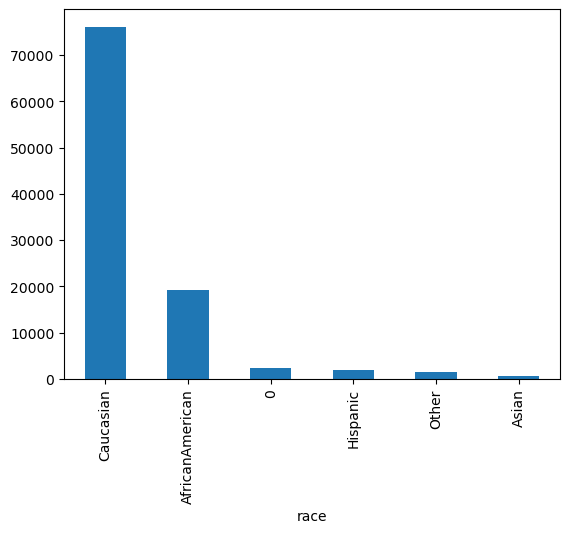

In [447]:
#now the categorical variables
diabetic_data['race'].value_counts().plot(kind='bar')

In [448]:
#check the 0 for other values
diabetic_data['race'].value_counts(dropna=False)

race
Caucasian          76099
AfricanAmerican    19210
0                   2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64

In [449]:
#replacing 0 with NaN as it might affect the result
diabetic_data['race'].replace('0', np.nan, inplace=True)

C:\Users\aasha\AppData\Local\Temp\ipykernel_17076\3530137662.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetic_data['race'].replace('0', np.nan, inplace=True)


In [450]:
#finding the number of the missing values
diabetic_data['race'].isna().sum()

2273

In [496]:
# Removing rows with missing values in the 'race' column 
# because 'race' is an important categorical feature 
# and cannot be imputed reliably for analysis.
diabetic_data = diabetic_data.dropna(subset=['race'])

<Axes: >

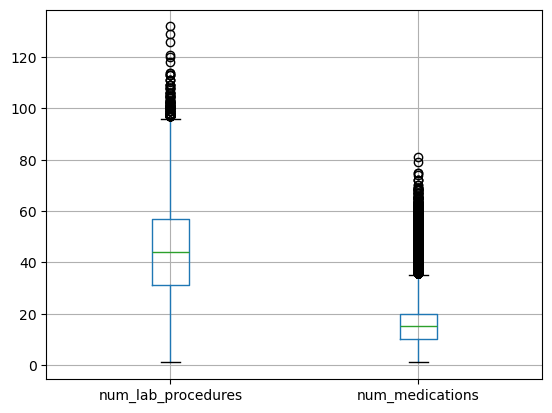

In [498]:
# Creating boxplots for 'num_lab_procedures' and 'num_medications' 
# to visualize the distribution, detect outliers, and compare variability.
diabetic_data[['num_lab_procedures', 'num_medications']].boxplot()

<Axes: xlabel='gender'>

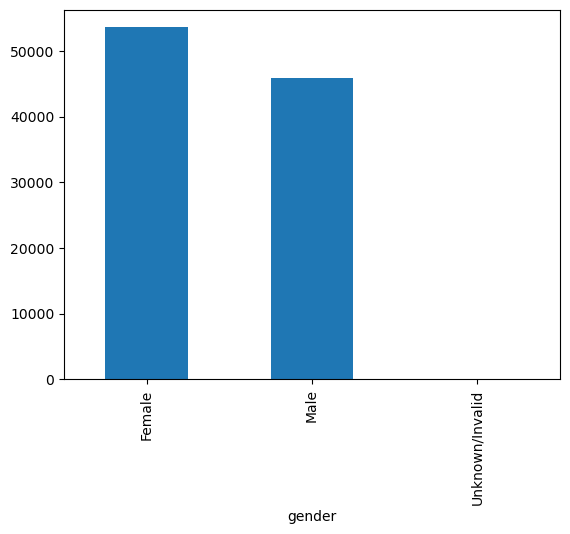

In [500]:
# Plotting a bar chart of patient counts by gender 
# to understand the gender distribution in the dataset.
diabetic_data['gender'].value_counts().plot(kind='bar')

<Axes: xlabel='gender'>

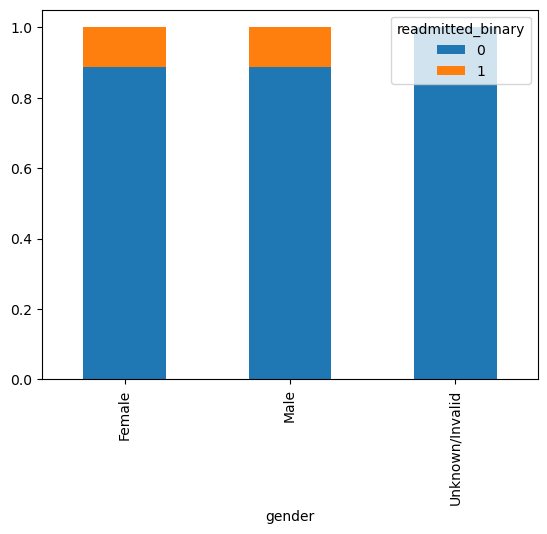

In [502]:
#Finding the relationship between the categorical features and the target
pd.crosstab(diabetic_data['gender'], diabetic_data['readmitted_binary'], normalize='index').plot(kind='bar', stacked=True)

<Axes: xlabel='readmitted_binary', ylabel='num_lab_procedures'>

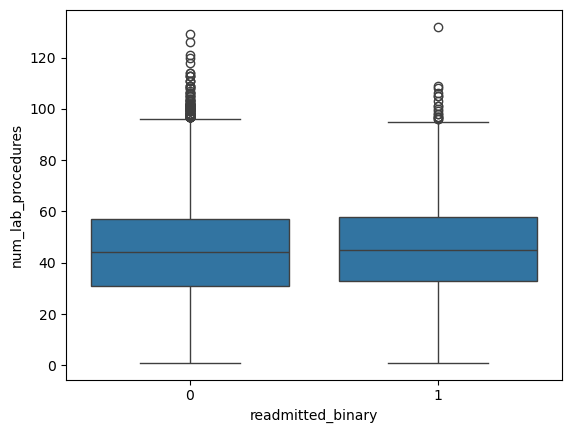

In [504]:
#for the numerical features
import seaborn as sns
sns.boxplot(data= diabetic_data, x='readmitted_binary', y='num_lab_procedures')

<Axes: >

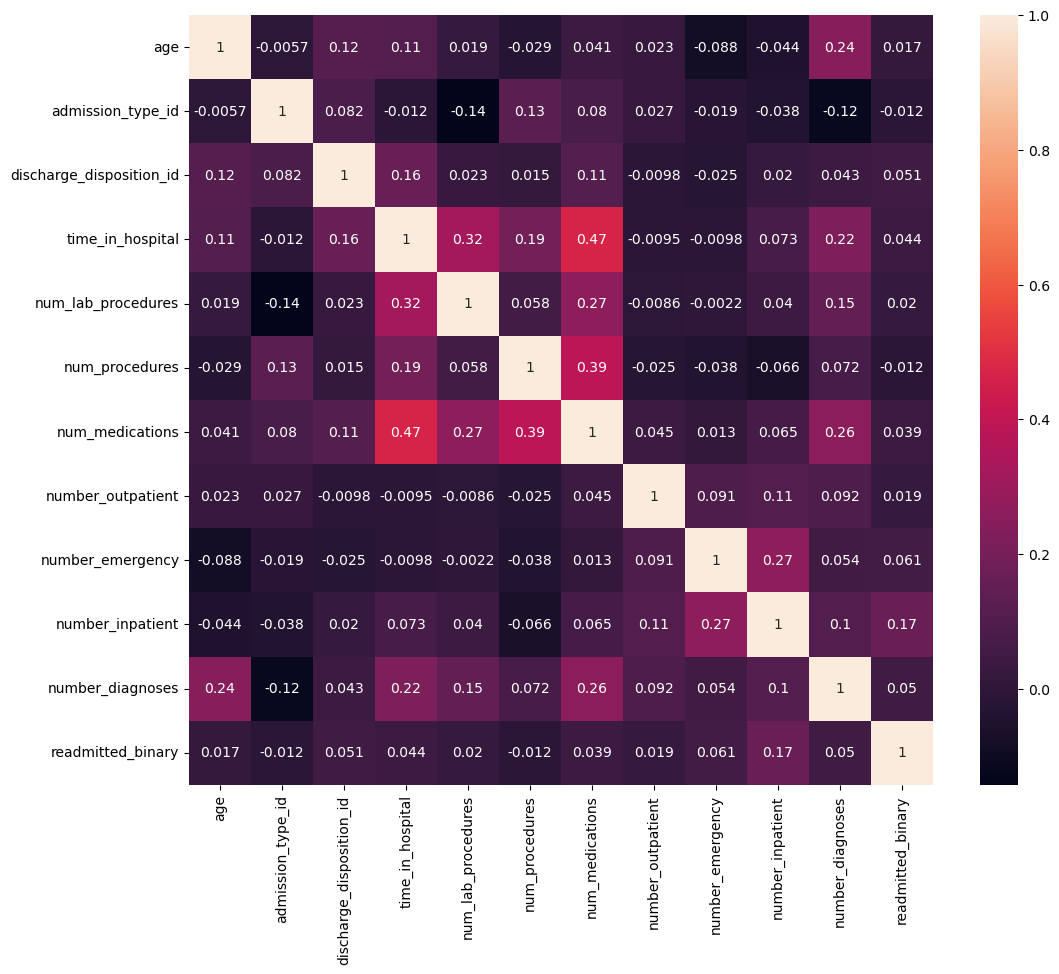

In [508]:
# Calculating Pearson correlation matrix for numeric features 
# and visualizing it with a heatmap to identify relationships 
# and potential multicollinearity among variables.
corr = diabetic_data.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True)

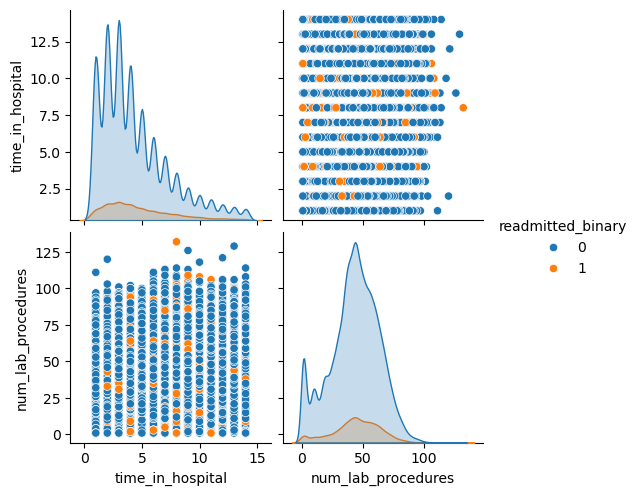

In [510]:
# Creating pairplots of 'time_in_hospital' and 'num_lab_procedures' colored by 'readmitted_binary' 
# to explore the distribution and relationships of these features across readmission status groups.
sns.pairplot(diabetic_data[['readmitted_binary', 'time_in_hospital', 'num_lab_procedures']], hue='readmitted_binary')

In [512]:
# Calculating the proportion of patients readmitted within 30 days vs. not,
# to understand the class balance of the target variable.
diabetic_data['readmitted_binary'].value_counts(normalize=True)

readmitted_binary
0    0.887741
1    0.112259
Name: proportion, dtype: float64

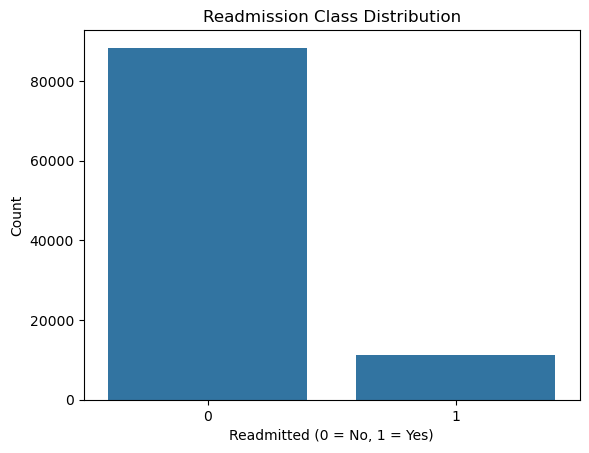

In [514]:
# Plotting the count of patients by readmission status (0 = No, 1 = Yes) 
# to visualize the distribution of the target variable and check for class imbalance.
sns.countplot(x='readmitted_binary', data= diabetic_data)
plt.title('Readmission Class Distribution')
plt.xlabel('Readmitted (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

In [516]:
#t-test between readmitted and non readmitted group
group1 = diabetic_data[diabetic_data['readmitted_binary'] == 1]['num_lab_procedures']
group2 = diabetic_data[diabetic_data['readmitted_binary'] == 0]['num_lab_procedures']

t_stat, p_val = ttest_ind(group1, group2, nan_policy='omit')
print(f"T-statistic: {t_stat}, P-value: {p_val}")

T-statistic: 6.463780616602535, P-value: 1.0258899738921809e-10


In [518]:
#saving the cleaned data
diabetic_data.to_csv('diabetic_data_cleaned.csv', index=False)